In [48]:
import pandas as pd

In [2]:
df = pd.read_csv("Output/testingDataUNB.csv")

In [8]:
commonBots = ['147.32.84.180', '147.32.84.170'] # Neris and Rbot ip addresses

In [11]:
result = df[(df.SrcAddr.isin(commonBots)) | (df.DstAddr.isin(commonBots))]

In [12]:
filename = "Output/testingDataUNB-filtered.csv"
result.to_csv(filename, encoding='utf-8', index=False)

In [1]:
import pickle as pk

In [4]:
with open("Models/LinearSVCModel.pkl", 'rb') as file:
    model = pk.load(file)

In [25]:
model.coef_

array([[ 1.17683409e-04, -4.34067903e-05, -5.07704955e-05,
        -5.63441597e-02,  4.39507152e-05, -4.35119920e-04,
        -3.42475682e-01,  4.33034976e-04, -3.42274434e-04,
         3.03078730e-04, -4.33887618e-04, -1.70206781e-05,
        -6.33968989e-04, -2.69821809e-03,  2.46934957e-05,
         5.51784014e-04,  4.26159124e-07,  5.33298531e-05,
         2.85617987e-03, -2.11667773e-01, -1.49544741e-02,
         1.68326180e+00, -8.70164880e-01]])

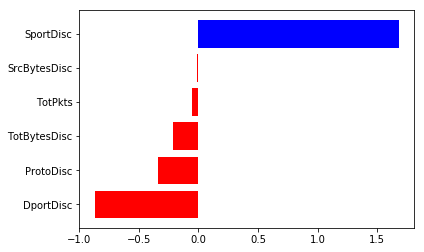

In [46]:
# Source https://stackoverflow.com/questions/41592661/determining-the-most-contributing-features-for-svm-classifier-in-sklearn

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt
import numpy as np
def f_importances(coef, names):
    imp = coef
    coef_name_pair = zip(imp,names)
    coef_name_pair = [(i,x) for i,x in coef_name_pair if abs(i) > 0.005]

    imp,names = zip(*sorted(coef_name_pair))
    colors = ['blue' if i > 0 else 'red' for i in imp]
    plt.barh(range(len(names)), imp, align='center', color=colors)
    plt.yticks(range(len(names)), names)
    plt.show()

f_importances(model.coef_[0], ["Dur","Sport","Dport","TotPkts","TotBytes","SrcBytes","ProtoDisc","SrcAddr_App","Src_Dport_unique","Src_DstAddr_unique","Src_Sport_unique","Src_TotPkts_mean","DstAddr_App","Dst_Dport_unique","Dst_SrcAddr_unique","Dst_Sport_unique","Dst_TotPkts_mean","SrcDst_Sport_unique","SrcDst_Dport_unique","TotBytesDisc","SrcBytesDisc","SportDisc","DportDisc"])

In [49]:
data = pd.read_csv("Output/finalTestingData.csv")

In [50]:
neris_ip = '147.32.84.165'

In [66]:
data[(data.SrcAddr == neris_ip) | (data.DstAddr == neris_ip)].SportDisc.value_counts()

1    22937
2       61
0       22
Name: SportDisc, dtype: int64

In [70]:
data[(data.SrcAddr == neris_ip) | (data.DstAddr == neris_ip)].DportDisc.value_counts()

0    21653
1     1072
2      295
Name: DportDisc, dtype: int64

In [68]:
data[(data.SrcAddr == neris_ip) | (data.DstAddr == neris_ip)].ProtoDisc.value_counts()

4    15169
3     7851
Name: ProtoDisc, dtype: int64

In [71]:
data[(data.SrcAddr == neris_ip) | (data.DstAddr == neris_ip)].TotPkts.value_counts()

2         15552
3          3016
1          2204
10          261
6           245
4           223
8           139
11          127
12           88
15           85
16           82
14           56
13           55
7            51
9            44
17           41
23           41
22           40
28           34
48           32
5            32
36           23
33           22
25           22
19           21
18           20
21           18
30           17
20           15
37           14
          ...  
255           1
219           1
91            1
197           1
263           1
6918          1
15234         1
3892          1
54            1
150           1
182           1
198           1
694           1
151           1
167           1
183           1
607           1
874           1
391           1
176254        1
168           1
216           1
89            1
105           1
201           1
217           1
329           1
154           1
18963         1
295           1
Name: TotPkts, Length: 1